In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import h5py
url = '/content/gdrive/My Drive/ml project/Untitled folder/dataml.h5'
a = h5py.File(url,'r')
x_train = a['x_train']
y_train = a['Y_train']
x_test = a['x_test']
y_test = a['y_test']

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.reshape(-1,8,8,8,1)
x_test = x_test.reshape(-1,8,8,8,1)


In [0]:
import keras
from keras.models import Sequential 
from keras.layers import Dense , Activation , Dropout , Flatten , Conv3D , MaxPooling3D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv3D(16,(1,1,1) , activation = 'relu' , padding = 'same' , input_shape = (8,8,8,1)))
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))   
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))
model.add(MaxPooling3D((2,2,2) ,  padding = 'same'))
model.add(Conv3D(32,(1,1,1) , activation = 'relu',  padding = 'same'))
model.add(Flatten())
model.add(Dense(4000,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4000,activation = 'relu')) 
model.add(Dense(1000,activation = 'relu'))          
model.add(Dropout(0.4))   
model.add(Dense(1,activation = 'linear'))

In [0]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy' ])


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 8, 8, 8, 16)       32        
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 8, 8, 8, 32)       544       
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 8, 8, 8, 32)       1056      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 4, 4, 32)       0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 4, 4, 4, 32)       1056      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4000)              8196000   
__________

In [0]:
history =model.fit(x_train , y_train, epochs = 20 , batch_size = 5000, validation_data=(x_test,y_test))

Train on 603267 samples, validate on 201090 samples
Epoch 1/20
603267/603267 [==============================] - 44s 72us/step - loss: 0.3390 - acc: 0.9184 - val_loss: 0.3321 - val_acc: 0.9232
Epoch 2/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3330 - acc: 0.9188 - val_loss: 0.3251 - val_acc: 0.9243
Epoch 3/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3245 - acc: 0.9188 - val_loss: 0.3217 - val_acc: 0.9251
Epoch 4/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3243 - acc: 0.9200 - val_loss: 0.3133 - val_acc: 0.9247
Epoch 5/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3156 - acc: 0.9202 - val_loss: 0.3052 - val_acc: 0.9242
Epoch 6/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3170 - acc: 0.9204 - val_loss: 0.3040 - val_acc: 0.9246
Epoch 7/20
603267/603267 [==============================] - 43s 71us/step - loss: 0.3133 - acc: 0.9205 - val

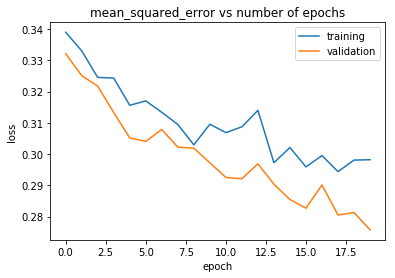

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'loss'
plt_title = 'mean_squared_error vs number of epochs'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['loss'], label = 'training')
ax.plot(history.history['val_loss'], label = 'validation')
plt.legend()

plt.show()

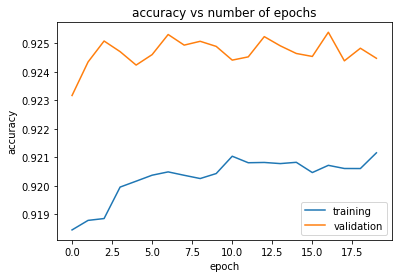

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'accuracy'
plt_title = 'accuracy vs number of epochs'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['acc'], label = 'training')
ax.plot(history.history['val_acc'], label = 'validation')
plt.legend()

plt.show()